In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
module_items_df = pd.read_csv('data/additional/module_items.csv')
from sklearn.dummy import DummyClassifier, DummyRegressor
import numpy as np
# Preprocessing and pipeline
from sklearn.impute import SimpleImputer
import mglearn
# train test split and cross validation
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [2]:
module_items_df.head()

,id,title,position,indent,quiz_lti,type,module_id,page_url,published,content_id,module_name,module_position
0,26503cd777cadb209a97e307a1ec3af8,Assignment 1,14,1,False,Assignment,7e7c000c755210949c3819a0e3a3eb74,NaN,True,dcccda945258b1f93f8991c7c1f9e2d8,Module 1: Understanding eLearning (two weeks l...,3
1,fcdfbc030a9ac50c06ce4a9ebc14b729,Assignment 1,3,1,False,Assignment,9be3f97935920a983d9274a6c54dfbb8,NaN,True,dcccda945258b1f93f8991c7c1f9e2d8,Module 2: eLearning readiness (two weeks long),4
2,fd315af316a5a6e8d9cab40dc39bf569,Assignment 2,10,1,False,Assignment,ce26f7eecd5831e66a3ac4067c3e3733,NaN,True,e0a7643d52f694d38361baef57479a70,Module 3: Institutional organization and suppo...,5
3,38947f69cb85333c28dbd319d307f559,Assignment 2,3,1,False,Assignment,3abc203cbf91a7e349498e9fe130eba5,NaN,True,e0a7643d52f694d38361baef57479a70,Module 4: Institutional planning for eLearning...,6
4,ec099680e4eb97832df74a928397fbb5,Discussion 9: Aligning institutional plans wit...,7,1,False,Discussion,cc2bdba2e0464b8a4a08f016520a4222,NaN,True,6f51d776df9d2b06eaf568e77ab46fee,Module 5: Government planning for eLearning (t...,7


In [3]:
pages_df = pd.read_csv('data/additional/pages.csv')
pages_df

,title,page_url,id,published
0,0.1 Course overview,0-dot-1-course-overview,b1d898888f6c7b3835249eafba32fda8,True
1,0.10 UBC grading guidelines,0-dot-10-ubc-grading-guidelines,d4e9d4c9e20351932d918333d0ac5d5d,True
2,0.11 Academic misconduct,0-dot-11-academic-misconduct,319770f1c152eab3ecc23afe264b2f12,True
3,"0.12 Accessibility, equity & diversity, netiqu...",0-dot-12-accessibility-equity-and-diversity-ne...,9b956857f78a44a200aedbc13825b886,True
4,0.13 Learning analytics,0-dot-13-learning-analytics,2d1bb7da0411ccc855e29a7455ae20f7,True
...,...,...,...,...
87,[wikipage] Assignment 2 Group sign up,wikipage-assignment-2-group-sign-up,972196dd128aeb62a66f5c02b897e7dd,True
88,Wikipage Assignment 2 Group Sign Up (Optional),wikipage-assignment-2-group-sign-up-optional,9ee9a2cacefb8be58dde2a381617e0ad,True
89,[wikipage] Assignment 3 Group sign up (optional),wikipage-assignment-3-group-sign-up-optional,0790ff605875f7393f9fde5c50c3eae4,True
90,Your Instructor,your-instructor,47cc5ac28d341bcc8e175c649974a314,True


In [4]:
nav_df = pd.read_csv('data/navigation_events.csv')
nav_df.columns

pd.DataFrame([nav_df.columns,[(nav_df[col].unique()) for col in nav_df.columns]]).T


,0,1
0,type,[NavigationEvent]
1,action,[navigatedto]
2,event_time,"[2033-03-27 03:08:48.947000+00:00, 2033-03-30 ..."
3,session_id,"[f8eac5633f79de90a77b33338b14dd8e, 90d33cac128..."
4,membership_role,"[[""Learner""], [""Instructor""], Null]"
5,membership_type,[Membership]
6,event__id,"[a3bd94baaa440f4793ad08bb64ed3a8f, 0f137ee4ff1..."
7,event__type,[NavigationEvent]
8,event__actor_type,[Person]
9,event__action,[NavigatedTo]


In [5]:
discussion_df = pd.read_csv('data/additional/discussions.csv')
discussion_df
discussion_topic_df = pd.read_csv('data/additional/discussion_topics.csv')

discussion_df['id'] = discussion_df['discussion_topic_id']
discussion_combined_df = discussion_df.merge(discussion_topic_df)
pd.DataFrame([discussion_combined_df.columns,
              [(discussion_combined_df[col].unique()) for col in discussion_combined_df.columns]]).T

,0,1
0,actor_id,"[INSTRUCTOR, LEARNER_3, LEARNER_11, LEARNER_10..."
1,membership_role,"[[""Instructor""], [""Learner""]]"
2,timestamp,"[2033-01-18 17:13:01+00:00, 2033-01-18 17:13:0..."
3,post_id,"[e29fca96e5557a20cabec778dc885345, cf6816ae103..."
4,post_parent_id,"[1e1288fa5e19f13c45b0231e8cbedab6, cf6816ae103..."
5,discussion_topic_title,"[Assignment 1 Discussion forum, Casual Area, D..."
6,discussion_topic_id,"[132f3fab56d60839d727b966a76c1b1e, a475fae949c..."
7,discussion_topic_message_length,"[367, 79, 264, 223, 1369, 546, 422, 388, 711, ..."
8,post_message_length,"[0, 564, 174, 226, 1566, 408, 1409, 1985, 535,..."
9,count_of_likes,"[0, 2, 1, 3, 4, 7]"


In [6]:
discussion_combined_df.head()


,actor_id,membership_role,timestamp,post_id,post_parent_id,discussion_topic_title,discussion_topic_id,discussion_topic_message_length,post_message_length,count_of_likes,...,podcast_has_student_posts,discussion_type,lock_at,allow_rating,discussion_subentry_count,podcast_url,read_state,published,pinned,todo_date_date
0,INSTRUCTOR,"[""Instructor""]",2033-01-18 17:13:01+00:00,e29fca96e5557a20cabec778dc885345,1e1288fa5e19f13c45b0231e8cbedab6,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,367,0,0,...,False,threaded,NaN,True,0,NaN,read,True,False,NaN
1,INSTRUCTOR,"[""Instructor""]",2033-01-18 17:13:02+00:00,cf6816ae103ab5e2c82d6595eb49e02e,1e1288fa5e19f13c45b0231e8cbedab6,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,0,0,...,False,threaded,NaN,True,0,NaN,read,True,False,NaN
2,LEARNER_3,"[""Learner""]",2033-01-28 06:55:40+00:00,abb6c24171f8b195cf0d050858e4ff18,cf6816ae103ab5e2c82d6595eb49e02e,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,564,0,...,False,threaded,NaN,True,0,NaN,read,True,False,NaN
3,LEARNER_11,"[""Learner""]",2033-01-29 01:04:32+00:00,a250f9cde1c58d4dba3d4f918e82a018,abb6c24171f8b195cf0d050858e4ff18,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,174,0,...,False,threaded,NaN,True,0,NaN,read,True,False,NaN
4,LEARNER_3,"[""Learner""]",2033-01-29 05:54:31+00:00,3ac8537702d3d7d8bf033d73a4491591,a250f9cde1c58d4dba3d4f918e82a018,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,226,0,...,False,threaded,NaN,True,0,NaN,read,True,False,NaN


In [7]:
discussion_df

,actor_id,membership_role,timestamp,post_id,post_parent_id,discussion_topic_title,discussion_topic_id,discussion_topic_message_length,post_message_length,count_of_likes,id
0,INSTRUCTOR,"[""Instructor""]",2033-01-18 17:13:01+00:00,e29fca96e5557a20cabec778dc885345,1e1288fa5e19f13c45b0231e8cbedab6,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,367,0,0,132f3fab56d60839d727b966a76c1b1e
1,INSTRUCTOR,"[""Instructor""]",2033-01-18 17:13:02+00:00,cf6816ae103ab5e2c82d6595eb49e02e,1e1288fa5e19f13c45b0231e8cbedab6,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,0,0,132f3fab56d60839d727b966a76c1b1e
2,LEARNER_3,"[""Learner""]",2033-01-28 06:55:40+00:00,abb6c24171f8b195cf0d050858e4ff18,cf6816ae103ab5e2c82d6595eb49e02e,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,564,0,132f3fab56d60839d727b966a76c1b1e
3,LEARNER_11,"[""Learner""]",2033-01-29 01:04:32+00:00,a250f9cde1c58d4dba3d4f918e82a018,abb6c24171f8b195cf0d050858e4ff18,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,174,0,132f3fab56d60839d727b966a76c1b1e
4,LEARNER_3,"[""Learner""]",2033-01-29 05:54:31+00:00,3ac8537702d3d7d8bf033d73a4491591,a250f9cde1c58d4dba3d4f918e82a018,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,226,0,132f3fab56d60839d727b966a76c1b1e
...,...,...,...,...,...,...,...,...,...,...,...
1606,LEARNER_19,"[""Learner""]",2033-03-23 15:59:20+00:00,7a91b20369b9853e87f56d13600bb2a5,d6fe64dc8c4e1ede591ff45a98e7255c,Q&A with Guest Speaker,3bc2d8a4ae8dfa21b926bc34599560e2,332,1100,0,3bc2d8a4ae8dfa21b926bc34599560e2
1607,INSTRUCTOR,"[""Instructor""]",2033-03-24 09:51:33+00:00,ed80eb6d2d9f9f86fec336142fb849af,d6fe64dc8c4e1ede591ff45a98e7255c,Q&A with Guest Speaker,3bc2d8a4ae8dfa21b926bc34599560e2,332,111,0,3bc2d8a4ae8dfa21b926bc34599560e2
1608,LEARNER_14,"[""Learner""]",2033-03-24 10:01:51+00:00,a1210d7d04b9dc8555f53e773af18a28,d6fe64dc8c4e1ede591ff45a98e7255c,Q&A with Guest Speaker,3bc2d8a4ae8dfa21b926bc34599560e2,332,611,0,3bc2d8a4ae8dfa21b926bc34599560e2
1609,LEARNER_2,"[""Learner""]",2033-03-26 16:10:40+00:00,d6d1a9d82c7fa0226e012984b81c0e41,d6fe64dc8c4e1ede591ff45a98e7255c,Q&A with Guest Speaker,3bc2d8a4ae8dfa21b926bc34599560e2,332,237,0,3bc2d8a4ae8dfa21b926bc34599560e2


In [8]:
grade_df = pd.read_csv('data/additional/gradebook.csv')

In [9]:
grade_df['actor_id'] = grade_df['Student']
# grade_df.merge(discussion_df).groupby('Student').aggregate('mean')

df = grade_df.merge(discussion_df)

In [10]:
enrol_df = pd.read_csv('data/additional/enrollments.csv')
enrol_df['Student'] = enrol_df['user_id']
df = df.merge(enrol_df)


df.to_csv('data.csv')

In [11]:
df.columns

Index(['Student', 'Assignment 1 (c81f04547a95da2a7b88054ef491b7c4)',
       'Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8)',
       'Assignment 3 (option A) (811d93ea379b5cdd5a19f1b5dbab88cd)',
       'Assignment 3 (option B) (df8d1f1ff3f48fdc24a278b40c5f45cc)',
       'Assignment 3 (option C) (bb971b36c1578cede00150acda89aa99)',
       'Assignment 3 (option D) (f1ad954cd2cddda6e17f6fc225d1aa3e)',
       'Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114)',
       'Assignment 1 Current Score', 'Assignment 2 Current Score',
       'Assignment 3 Current Score',
       'Participation & engagement Current Score', 'Current Score', 'actor_id',
       'membership_role', 'timestamp', 'post_id', 'post_parent_id',
       'discussion_topic_title', 'discussion_topic_id',
       'discussion_topic_message_length', 'post_message_length',
       'count_of_likes', 'id', 'user_id', 'type', 'last_activity_at',
       'last_attended_at', 'total_activity_time'

In [12]:
num_cols = ['Assignment 1 (c81f04547a95da2a7b88054ef491b7c4)',
       'Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8)',
       'Assignment 3 (option A) (811d93ea379b5cdd5a19f1b5dbab88cd)',
       'Assignment 3 (option B) (df8d1f1ff3f48fdc24a278b40c5f45cc)',
       'Assignment 3 (option C) (bb971b36c1578cede00150acda89aa99)',
       'Assignment 3 (option D) (f1ad954cd2cddda6e17f6fc225d1aa3e)',
       'Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114)',
       'Assignment 1 Current Score', 'Assignment 2 Current Score',
       'Assignment 3 Current Score',
       'Participation & engagement Current Score', 'Current Score',]

for col in num_cols:
    df[col] = df[col].apply(float)

In [13]:
df['Assignment 1 (c81f04547a95da2a7b88054ef491b7c4)']

0       88.0
1       88.0
2       88.0
3       88.0
4       88.0
        ... 
1291    73.0
1292    73.0
1293    73.0
1294    73.0
1295    73.0
Name: Assignment 1 (c81f04547a95da2a7b88054ef491b7c4), Length: 1296, dtype: float64

In [14]:
df_mean = df.groupby('Student').aggregate('mean')
df_sum = df.groupby('Student').aggregate('sum')
df_count = df.groupby('Student').aggregate('count')

df_mean.to_csv('data_mean.csv')
df_sum.to_csv('data_sum.csv')

In [15]:
df_count.iloc[-3]

Assignment 1 (c81f04547a95da2a7b88054ef491b7c4)                                                    166
Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8)                                                    166
Assignment 3 (option A) (811d93ea379b5cdd5a19f1b5dbab88cd)                                           0
Assignment 3 (option B) (df8d1f1ff3f48fdc24a278b40c5f45cc)                                         166
Assignment 3 (option C) (bb971b36c1578cede00150acda89aa99)                                           0
Assignment 3 (option D) (f1ad954cd2cddda6e17f6fc225d1aa3e)                                           0
Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114)    166
Assignment 1 Current Score                                                                         166
Assignment 2 Current Score                                                                         166
Assignment 3 Current Score                                               

In [16]:
df_mean.head()

,Assignment 1 (c81f04547a95da2a7b88054ef491b7c4),Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8),Assignment 3 (option A) (811d93ea379b5cdd5a19f1b5dbab88cd),Assignment 3 (option B) (df8d1f1ff3f48fdc24a278b40c5f45cc),Assignment 3 (option C) (bb971b36c1578cede00150acda89aa99),Assignment 3 (option D) (f1ad954cd2cddda6e17f6fc225d1aa3e),Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114),Assignment 1 Current Score,Assignment 2 Current Score,Assignment 3 Current Score,Participation & engagement Current Score,Current Score,discussion_topic_message_length,post_message_length,count_of_likes,last_attended_at,total_activity_time
Student,,,,,,,,,,,,,,,,,
LEARNER_1,79.0,84.0,NaN,NaN,73.0,NaN,9.0,79.0,84.0,73.0,90.0,80.9,871.928571,2401.214286,0.214286,NaN,985351.0
LEARNER_10,88.0,72.0,74.0,NaN,NaN,NaN,8.5,88.0,72.0,74.0,85.0,78.4,851.035088,1059.263158,0.298246,NaN,421763.0
LEARNER_11,90.0,79.0,NaN,NaN,82.0,NaN,9.0,90.0,79.0,82.0,90.0,84.3,998.500000,1276.906250,0.156250,NaN,285214.0
LEARNER_12,86.0,87.0,NaN,NaN,73.0,NaN,8.0,86.0,87.0,73.0,80.0,81.2,953.600000,1141.900000,0.200000,NaN,176035.0
LEARNER_13,88.0,86.0,87.0,NaN,NaN,NaN,8.0,88.0,86.0,87.0,80.0,85.5,899.682927,1076.146341,0.219512,NaN,774430.0


In [17]:
df_sum.head()

,Assignment 1 (c81f04547a95da2a7b88054ef491b7c4),Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8),Assignment 3 (option A) (811d93ea379b5cdd5a19f1b5dbab88cd),Assignment 3 (option B) (df8d1f1ff3f48fdc24a278b40c5f45cc),Assignment 3 (option C) (bb971b36c1578cede00150acda89aa99),Assignment 3 (option D) (f1ad954cd2cddda6e17f6fc225d1aa3e),Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114),Assignment 1 Current Score,Assignment 2 Current Score,Assignment 3 Current Score,Participation & engagement Current Score,Current Score,discussion_topic_message_length,post_message_length,count_of_likes,last_attended_at,total_activity_time
Student,,,,,,,,,,,,,,,,,
LEARNER_1,1106.0,1176.0,0.0,0.0,1022.0,0.0,126.0,1106.0,1176.0,1022.0,1260.0,1132.6,12207,33617,3,0.0,13794914
LEARNER_10,5016.0,4104.0,4218.0,0.0,0.0,0.0,484.5,5016.0,4104.0,4218.0,4845.0,4468.8,48509,60378,17,0.0,24040491
LEARNER_11,2880.0,2528.0,0.0,0.0,2624.0,0.0,288.0,2880.0,2528.0,2624.0,2880.0,2697.6,31952,40861,5,0.0,9126848
LEARNER_12,1720.0,1740.0,0.0,0.0,1460.0,0.0,160.0,1720.0,1740.0,1460.0,1600.0,1624.0,19072,22838,4,0.0,3520700
LEARNER_13,3608.0,3526.0,3567.0,0.0,0.0,0.0,328.0,3608.0,3526.0,3567.0,3280.0,3505.5,36887,44122,9,0.0,31751630


In [18]:
canvas_df = pd.concat([df_mean[['Participation & engagement Current Score','Current Score',
                                'count_of_likes','total_activity_time']], 
                       df_sum[['discussion_topic_message_length','post_message_length']],
                      df_count[['last_activity_at']]],axis =1)

canvas_df['answer_count'] =  canvas_df['last_activity_at']
canvas_df = canvas_df.drop(['last_activity_at'],axis = 1)

In [19]:
# canvas_df.to_csv('canvas_df.csv')

In [20]:
# for col in canvas_df.columns:
#     canvas_df[col].hist()
#     plt.show()

In [21]:
train_df, test_df = train_test_split(canvas_df, test_size=0.2, random_state=123)

train_df.head()

,Participation & engagement Current Score,Current Score,count_of_likes,total_activity_time,discussion_topic_message_length,post_message_length,answer_count
Student,,,,,,,
LEARNER_16,100.0,82.0,0.196078,586198.0,45110,87921,51
LEARNER_33,40.0,72.1,0.000000,547149.0,9085,7047,9
LEARNER_20,55.0,69.7,0.045455,201541.0,21776,20719,22
LEARNER_2,60.0,84.6,0.290323,152876.0,22443,32704,31
LEARNER_25,90.0,87.3,0.205128,110669.0,34233,25090,39


In [22]:
X_train = train_df.drop(['Current Score'], axis=1)
X_test = test_df.drop(['Current Score'], axis=1)
y_train = train_df['Current Score']
y_test = test_df['Current Score']

In [23]:
dummy = DummyRegressor()
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

-0.04886244503632664

In [24]:

svr = SVR(kernel='linear')

pipe = make_pipeline(StandardScaler(), svr)
pipe.fit(X_train, y_train)
pipe.score(X_test,y_test)

0.3512155037729606

In [25]:
pd.DataFrame(pipe.predict(X_train),y_train)

,0
Current Score,
82.0,82.099938
72.1,71.999660
69.7,74.776971
84.6,77.977429
87.3,84.272649
85.5,81.570958
81.2,81.462060
82.3,77.606390
89.0,83.672564


In [26]:
pd.DataFrame(pipe.predict(X_test),y_test)

,0
Current Score,
65.7,72.872962
70.9,74.479592
84.4,72.458937
88.0,80.992390
78.3,79.749131
92.2,83.516217
78.5,75.942844


In [27]:

lr = LinearRegression()

pipe = make_pipeline(StandardScaler(), lr)
pipe.fit(X_train, y_train)
pipe.score(X_test,y_test)

0.3377115893215409

In [28]:
pd.DataFrame(pipe.predict(X_test),y_test)

,0
Current Score,
65.7,73.436971
70.9,73.315744
84.4,69.019655
88.0,82.609518
78.3,76.800560
92.2,90.378952
78.5,75.304511


In [29]:
lr.coef_

array([ 4.69445741,  1.01823222,  0.61822843, -6.81818202, -2.95181991,
        8.51483447])

In [30]:
X_train.columns

Index(['Participation & engagement Current Score', 'count_of_likes',
       'total_activity_time', 'discussion_topic_message_length',
       'post_message_length', 'answer_count'],
      dtype='object')

0.35576887345735164 1
0.4934825393331451 2
0.35521298427998194 3
0.26341908808280334 4
0.4510358649904056 5
0.3641735359967445 6
0.3354495594905801 7
0.13152586357292406 8
0.018582628227495124 9
0.07346094295184957 10
0.5186889392882076 11
0.45608262822749557 12
0.3493981158408943 13
0.061687674459176445 14
0.4068715108164699 15
0.4726644277739017 16
0.45610170969993113 17
0.39246499912770483 18
0.5352516573621782 19
0.3980367890788564 20
0.15106529134682523 21
0.3599692515701335 22
0.39246499912770483 23
0.3824472260990939 24
0.41536276605024514 25
0.1705856376482905 26
-0.005708086182833139 27
0.46304736566643523 28
0.4491369722609917 29
0.46304736566643523 30
0.2686644059665052 31
0.5186889392882076 32
0.30077852407536754 33
0.5296798674110268 34
0.06788915300069798 35
0.3689375436147948 36
0.41536276605024514 37
0.3768754361479424 38
0.5088047365666443 39
0.32430597958827767 40
0.3834967070830436 41
0.3187341896371261 42
-0.0058416564898806644 43
0.04993348743893922 44
0.4561017096

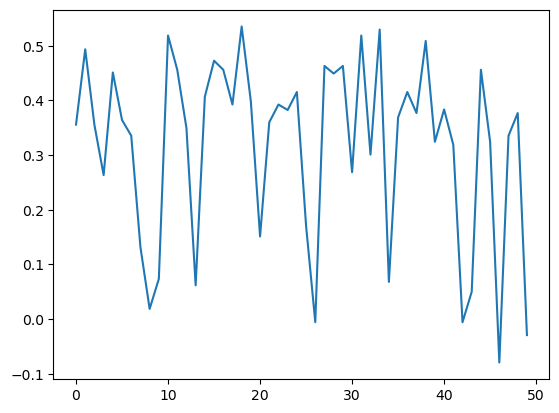

In [31]:
res = []
for i in range(50):
    tree = DecisionTreeRegressor(max_depth=i+1)

    pipe = make_pipeline(StandardScaler(), tree)
    pipe.fit(X_train, y_train)
    print(pipe.score(X_test,y_test), i+1)
    res.append(pipe.score(X_test,y_test))
    
plt.plot(range(50), res)

In [32]:

ridge = Ridge(alpha=1)

pipe = make_pipeline(StandardScaler(), ridge)
pipe.fit(X_train, y_train)
pipe.score(X_train, y_train)

0.731989761181396

In [33]:
pipe['ridge'].coef_

array([ 4.16411239,  1.32559565,  0.44398997, -0.700075  , -2.07163397,
        1.9361241 ])

In [41]:
X_train.columns

Index(['Participation & engagement Current Score', 'count_of_likes',
       'total_activity_time', 'discussion_topic_message_length',
       'post_message_length', 'answer_count'],
      dtype='object')

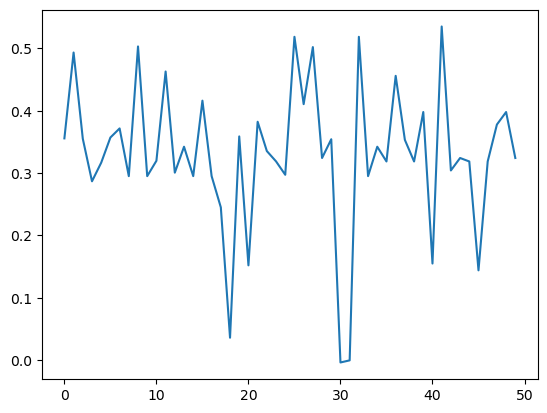

In [35]:
res = []
for i in range(50):
    tree = DecisionTreeRegressor(max_depth=i+1)

    pipe = make_pipeline(MinMaxScaler(), tree)
    pipe.fit(X_train, y_train)
    res.append(pipe.score(X_test,y_test))
    
plt.plot(range(50), res)

In [36]:
pipe_svm = make_pipeline(StandardScaler(), SVR(kernel = 'linear'))

param_grid = {
    "svr__gamma": [0.001, 0.01, 0.1, 1.0, 10, 100],
    "svr__C": [0.001, 0.01, 0.1, 1.0, 10, 100],
}

grid_search = GridSearchCV(
    pipe_svm, param_grid, cv=5, n_jobs=-1, return_train_score=True
)

In [37]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR(kernel='linear'))]),
             n_jobs=-1,
             param_grid={'svr__C': [0.001, 0.01, 0.1, 1.0, 10, 100],
                         'svr__gamma': [0.001, 0.01, 0.1, 1.0, 10, 100]},
             return_train_score=True)

In [38]:
grid_search.best_score_

0.37557520726641813

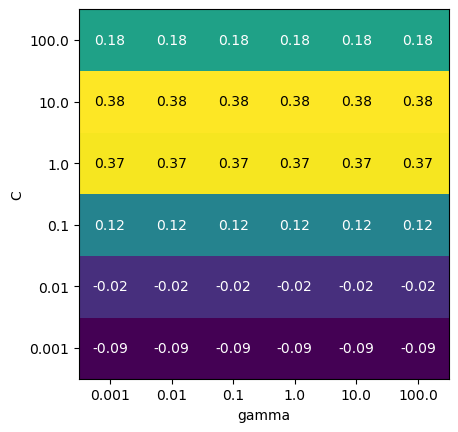

In [39]:
def display_heatmap(param_grid, pipe, X_train, y_train):
    grid_search = GridSearchCV(
        pipe, param_grid, cv=5, n_jobs=-1, return_train_score=True
    )
    grid_search.fit(X_train, y_train)
    results = pd.DataFrame(grid_search.cv_results_)
    scores = np.array(results.mean_test_score).reshape(6, 6)

    # plot the mean cross-validation scores
    mglearn.tools.heatmap(
        scores,
        xlabel="gamma",
        xticklabels=param_grid["svr__gamma"],
        ylabel="C",
        yticklabels=param_grid["svr__C"],
        cmap="viridis",
    );
param_grid1 = {
    "svr__gamma": 10.0**np.arange(-3, 3, 1), 
    "svr__C": 10.0**np.arange(-3, 3, 1)
}
display_heatmap(param_grid1, pipe_svm, X_train, y_train)